# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ekaprmdtya13/Machine_Learning_Dicoding/refs/heads/main/Dataset/Customers.csv")
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [5]:
df['Gender'].value_counts()

,count
Gender,
Female,1186
Male,814


In [6]:
df['Profession'].value_counts()

,count
Profession,
Artist,612
Healthcare,339
Entertainment,234
Engineer,179
Doctor,161
Executive,153
Lawyer,142
Marketing,85
Homemaker,60


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
# Mengisi nilai yang hilang pada kolom 'Profession' dengan modus
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


In [9]:
df.duplicated().sum()

0

In [10]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    ranges = {}
    for column in columns:
        if column not in df.columns:
            print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
            continue

        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar-kuartil

        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas

        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outliers[column] = outlier_indices
        ranges[column] = (lower_bound, upper_bound)

    return outliers, ranges

# Kolom yang ingin diperiksa secara manual
columns_to_check = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Deteksi outlier
outliers, ranges = detect_outliers_iqr(df, columns_to_check)

# Menampilkan hasil
def print_outliers_and_ranges(outliers, ranges, df):
    for column in ranges.keys():
        lower_bound, upper_bound = ranges[column]
        print(f"Rentang nilai valid pada kolom '{column}': {lower_bound} hingga {upper_bound}")

        if column in outliers and outliers[column]:
            print(f"Outlier pada kolom '{column}':")
            for idx in outliers[column]:
                print(f"  Index {idx}: {df.loc[idx, column]}")
        else:
            print(f"Tidak ada outlier pada kolom '{column}'")

print_outliers_and_ranges(outliers, ranges, df)

Rentang nilai valid pada kolom 'Age': -47.0 hingga 145.0
Tidak ada outlier pada kolom 'Age'
Rentang nilai valid pada kolom 'Annual Income ($)': -37209.125 hingga 260873.875
Tidak ada outlier pada kolom 'Annual Income ($)'
Rentang nilai valid pada kolom 'Spending Score (1-100)': -42.5 hingga 145.5
Tidak ada outlier pada kolom 'Spending Score (1-100)'
Rentang nilai valid pada kolom 'Work Experience': -8.0 hingga 16.0
Outlier pada kolom 'Work Experience':
  Index 392: 17
  Index 405: 17
  Index 473: 17
  Index 566: 17
  Index 603: 17
Rentang nilai valid pada kolom 'Family Size': -2.5 hingga 9.5
Tidak ada outlier pada kolom 'Family Size'


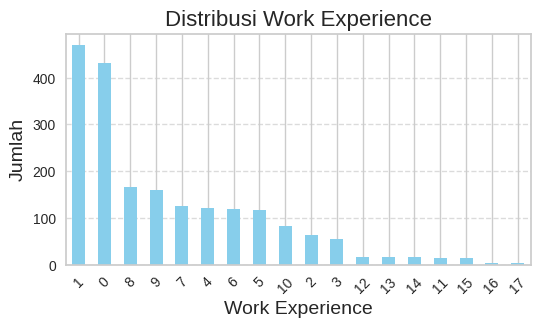

In [11]:
# Menghitung frekuensi nilai pada kolom 'Work Experience'
work_experience_counts = df['Work Experience'].value_counts()

# Membuat bar chart menggunakan Matplotlib
plt.figure(figsize=(6, 3))
work_experience_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Work Experience', fontsize=16)
plt.xlabel('Work Experience', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
df['Gender'] = lb.fit_transform(df['Gender'])
df['Profession'] = lb.fit_transform(df['Profession'])

In [13]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7
1996,1997,0,91,73158,32,1,7,7
1997,1998,1,87,90961,14,5,9,2
1998,1999,1,77,182109,4,4,7,2


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [14]:
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7]].values

print(pd.DataFrame(X, columns=['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']))

      Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0          1   19              15000                      39           5   
1          1   21              35000                      81           2   
2          0   20              86000                       6           2   
3          0   23              59000                      77           7   
4          0   31              38000                      40           3   
...      ...  ...                ...                     ...         ...   
1995       0   71             184387                      40           0   
1996       0   91              73158                      32           1   
1997       1   87              90961                      14           5   
1998       1   77             182109                       4           4   
1999       1   90             110610                      52           3   

      Work Experience  Family Size  
0                   1            4  
1            

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

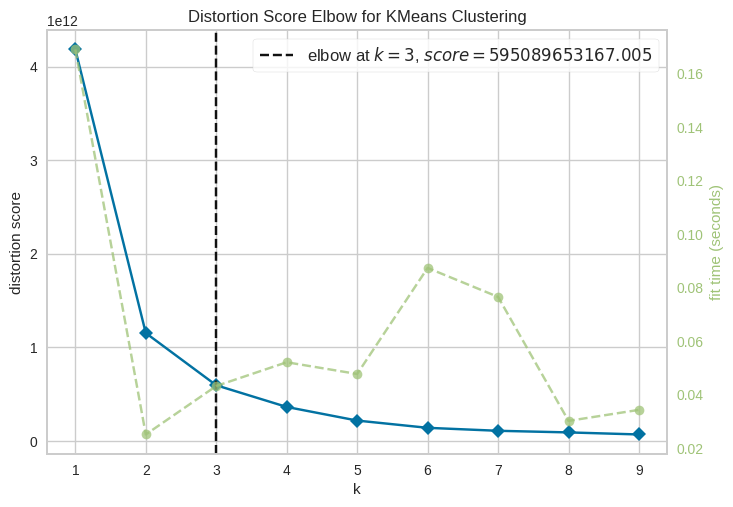

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans()
cluster = KElbowVisualizer(kmeans, k=(1, 10))
cluster.fit(X)
cluster.show()

In [16]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [17]:
# Inisialisasi VarianceThreshold dengan threshold variansi minimum
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Fit transform untuk memilih fitur
X_selected = selector.fit_transform(X)

# Mendapatkan fitur yang lolos seleksi
selected_features = selector.get_support(indices=True)
print("Indeks fitur yang dipilih:", selected_features)

# Jika menggunakan DataFrame, mendapatkan nama kolom fitur terpilih
if isinstance(X, pd.DataFrame):
    selected_columns = X.columns[selected_features]
    print("Nama kolom fitur yang dipilih:", selected_columns)


Indeks fitur yang dipilih: [0 1 2 3 4 5 6]


In [18]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan pseudo-label dari K-Means sebagai target sementara
pseudo_labels = kmeans.labels_

# Inisialisasi Lasso untuk seleksi fitur
alpha = 0.014
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, pseudo_labels)

# Mendapatkan koefisien Lasso
coef = lasso.coef_

# Seleksi fitur berdasarkan koefisien != 0
selected_features = np.where(coef != 0)[0]
print("Indeks fitur yang dipilih:", selected_features)

# Jika menggunakan DataFrame, mendapatkan nama kolom fitur terpilih
if isinstance(X, pd.DataFrame):
    selected_columns = X.columns[selected_features]
    print("Nama kolom fitur yang dipilih:", selected_columns)

Indeks fitur yang dipilih: [0 1 2 4 5]


In [19]:
X = df.iloc[:, [1, 2, 3, 5, 6]].values

print(pd.DataFrame(X, columns=['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience']))

      Gender  Age  Annual Income ($)  Profession  Work Experience
0          1   19              15000           5                1
1          1   21              35000           2                3
2          0   20              86000           2                1
3          0   23              59000           7                0
4          0   31              38000           3                2
...      ...  ...                ...         ...              ...
1995       0   71             184387           0                8
1996       0   91              73158           1                7
1997       1   87              90961           5                9
1998       1   77             182109           4                7
1999       1   90             110610           3                5

[2000 rows x 5 columns]


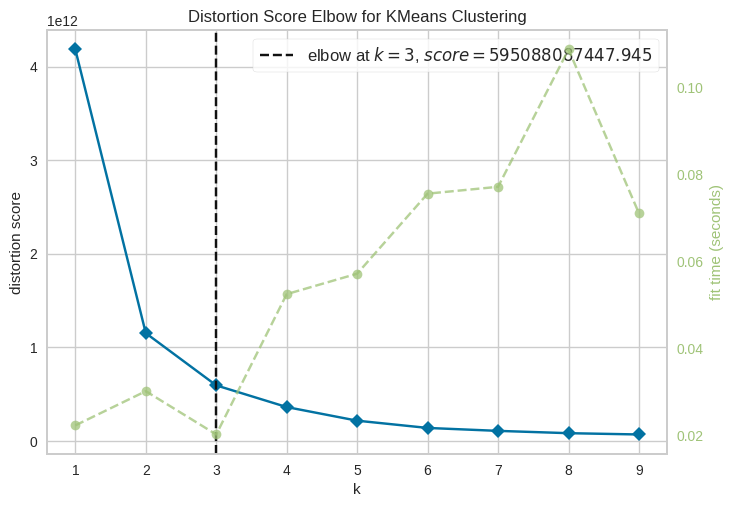

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans()
cluster = KElbowVisualizer(kmeans, k=(1, 10))
cluster.fit(X)
cluster.show()

In [21]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

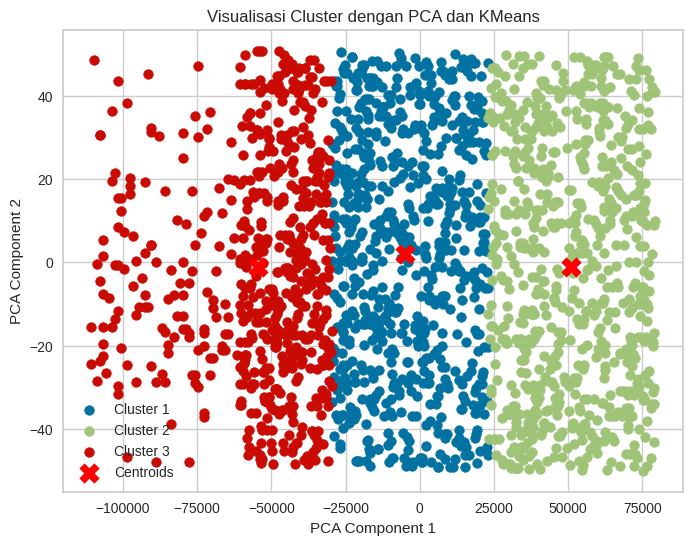

In [22]:
# Menggunakan PCA untuk mereduksi data ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Mendapatkan jumlah cluster
k = 3

# Mendapatkan centroid cluster di ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot setiap titik berdasarkan label cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    cluster_points = X_pca[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', s=50)

# Menambahkan centroid ke plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menambahkan label dan judul
plt.title("Visualisasi Cluster dengan PCA dan KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [23]:
# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k, categorical_columns=[]):
    """
    Menganalisis karakteristik cluster untuk data numerik dan kategorikal.

    Args:
    - X: Data input (numpy array).
    - labels: Label cluster hasil KMeans.
    - k: Jumlah cluster.
    - categorical_columns: List indeks kolom yang merupakan kategorikal.
    """
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        for col_idx in range(cluster_data.shape[1]):
            if col_idx in categorical_columns:
                # Analisis untuk data kategorikal
                unique, counts = np.unique(cluster_data[:, col_idx], return_counts=True)
                category_distribution = dict(zip(unique, counts))
                dominant_category = max(category_distribution, key=category_distribution.get)
                print(f"  Fitur {col_idx + 1} (Kategorikal):")
                print(f"    Distribusi: {category_distribution}")
                print(f"    Kategori Dominan: {dominant_category}")
            else:
                # Analisis untuk data numerik
                mean_value = cluster_data[:, col_idx].mean()
                print(f"  Fitur {col_idx + 1} (Numerik):")
                print(f"    Rata-rata: {mean_value:.2f}")

categorical_columns = [0, 3]  # Indeks kolom yang kategorikal
analyze_clusters(np.array(X), labels, k, categorical_columns=categorical_columns)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
  Fitur 1 (Kategorikal):
    Distribusi: {0: 399, 1: 311}
    Kategori Dominan: 0
  Fitur 2 (Numerik):
    Rata-rata: 51.00
  Fitur 3 (Numerik):
    Rata-rata: 106033.98
  Fitur 4 (Kategorikal):
    Distribusi: {0: 239, 1: 52, 2: 63, 3: 89, 4: 52, 5: 122, 6: 27, 7: 42, 8: 24}
    Kategori Dominan: 0
  Fitur 5 (Numerik):
    Rata-rata: 4.25

Cluster 2:
  Fitur 1 (Kategorikal):
    Distribusi: {0: 424, 1: 275}
    Kategori Dominan: 0
  Fitur 2 (Numerik):
    Rata-rata: 48.53
  Fitur 3 (Numerik):
    Rata-rata: 161639.66
  Fitur 4 (Kategorikal):
    Distribusi: {0: 211, 1: 60, 2: 64, 3: 79, 4: 59, 5: 124, 6: 16, 7: 53, 8: 33}
    Kategori Dominan: 0
  Fitur 5 (Numerik):
    Rata-rata: 4.33

Cluster 3:
  Fitur 1 (Kategorikal):
    Distribusi: {0: 363, 1: 228}
    Kategori Dominan: 0
  Fitur 2 (Numerik):
    Rata-rata: 47.02
  Fitur 3 (Numerik):
    Rata-rata: 56164.80
  Fitur 4 (Kategorikal):
    Distribusi: {0: 197, 1: 49, 2: 52, 3: 66, 4

Tulis hasil interpretasinya di sini.
1. Cluster 1:
  - **Gender:** Female (399), Male (311)
  - **Rata-rata Age:** 51.00 tahun
  - **Rata-rata Annual Income:** USD 106,033.98
  - **Kategori Dominan Profession:** Artist (239 orang, 33.7%)
  - **Rata-rata Work Experience** 4.25 tahun
  - **Analisis:** Cluster ini mencakup pelanggan yang mayoritas adalah perempuan dengan rata-rata umur tertua dan pendapatan tahunan menengah. Selain itu mayoritas pelanggan adalah artis dengan rata-rata pengalaman kerja menengah. Pada cluster ini cocok dijadikan target untuk produk dan layanan yang berfokus pada kesehatan, kenyamanan dan kreatifitas karena cluster ini berisi mayoritas orang tua, dengan memperhatikan harga yang terjangkau.
2. Cluster 2:
  - **Gender:** Female (424), Male (275)
  - **Rata-rata Age:** 48.53 tahun
  - **Rata-rata Annual Income:** USD 161,639.66
  - **Kategori Dominan Profession:** Artist (211 orang, 30.2%)
  - **Rata-rata Work Experience** 4.33 tahun
  - **Analisis:** Cluster ini mencakup pelanggan yang mayoritas adalah perempuan dengan rata-rata umur sedikit lebih muda dari cluster 1 dan pendapatan tahunan tertinggi. Selain itu mayoritas pelanggan adalah artis dengan rata-rata pengalaman kerja sedikit lebih berpengalaman dari cluster 1. Pada cluster ini cocok dijadikan target utama untuk produk atau layanan premium karena pendapatan tahunannya yang tinggi.
3. Cluster 3:
  - **Gender:** Female (363), Male (228)
  - **Rata-rata Age:** 47.02 tahun
  - **Rata-rata Annual Income:** USD 56,164.80
  - **Kategori Dominan Profession:** Artist (197 orang, 33.3%)
  - **Rata-rata Work Experience** 3.65 tahun
  - **Analisis:** Cluster ini mencakup pelanggan yang mayoritas adalah perempuan dengan rata-rata umur termuda dan pendapatan tahunan terendah. Selain itu mayoritas pelanggan adalah artis dengan rata-rata pengalaman kerja terendah. Pada cluster ini cocok dijadikan target untuk layanan pengembangan karir atau produk ekonomi karena memiliki umur termuda dan pendapatan terendah.

In [27]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,2
1,2,1,21,35000,81,2,3,3,2
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,2
4,5,0,31,38000,40,3,2,6,2
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7,1
1996,1997,0,91,73158,32,1,7,7,2
1997,1998,1,87,90961,14,5,9,2,0
1998,1999,1,77,182109,4,4,7,2,1


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df.to_csv("data_clustering.csv", index=False)